## Introduction
This notebook contains a limited analysis based on the responses to the CSCQ:EU survey of 2021. It is aimed as a supplement to the google-docs provided pie charts.
    
I have tried to keep it relatively shallow but still interesting, and apart from a couple of bar charts I've included some word counts.

Feel free to fork this and post your own visualizations. I have not gone in depth as I also like keeping it a little bit "rough" to see what everyone can do with the same data. Please note that the data set included in this repo does not include a small number of columns - some because the results were very personal (mentions of suicidal thoughts in how covid has affected your career were surprisingly common) and others because we'd like to keep them as feedback on our way of moderating the sub and providing interesting recurrent posts.

Feel free to shoot us a mod mail on [r/cscareerquestionseu](https://www.reddit.com/r/cscareerquestionsEU/) if you have any questions!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import wordcloud

sns.set_palette("deep")

In [2]:
df = pd.read_csv('csv_data_from_google_forms.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 31 columns):
 #   Column                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                            --------------  -----  
 0   Timestamp                                                                                                                                         301 non-null    object 
 1   Where are you from?                                                                                                                               290 non-null    object 
 2   What is your age group?                                                                                                                           299 non-null    object 
 3   What is your ed

In [4]:
df.head(1)

Timestamp Where are you from? What is your age group?  \
0  4/11/2021 1:09:13      United Kingdom                18 to 25   

  What is your education level (following, or completed)  \
0                                  Bachelor's degree       

  Is your current or prior education anything other than computing?  \
0                                                 No                  

  Are you currently enrolled somewhere as a student?  \
0                                                 No   

  How many years of experience do you have (incl. internships, if full-time)?  \
0                                                  1                            

  Open question: What do you mainly use the sub for?  \
0                             researching job market   

  Great to have you here on the sub! We started about four years ago. How long have you been a subscriber?  \
0  I've been here since the start! Don't you reme...                                                         

  How active do you consider yourself on the sub?  ...  \
0                  I comment or post occasionally  ...   

  Over the course of your career, how many job applications have you submitted?  \
0                                              500.0                              

  Have you experienced any negative effects of COVID-19 on your career?  \
0                                                Yes                      

  If you selected "yes" on the last question, could you tell us how?  \
0    harder to find new job but found one eventually                   

  How many times per week are you contacted by recruiters?  \
0                             Once or twice per week         

  Lastly, what do you find most important in a job?  \
0                             work and life balance   

  What programming language do you use most? Mandatory OS related question!  \
0                                         go                            Mac   

  What percentage of the day do you spend coding? (with 1 being 10%, 3 equals 30%..)  \
0                                                5.0                                   

  Have you contributed to open-source software?  \
0                                            No   

  What languages, tools or frameworks are you hoping to pick up the coming year(s)?  
0                                                NaN                                 

[1 rows x 31 columns]

## Age (1)

Text(0.5, 1.0, 'What is your age group?')

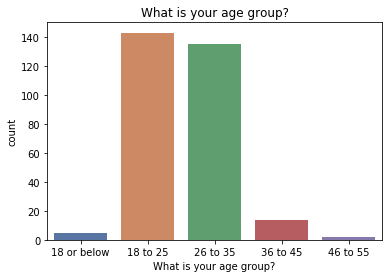

In [5]:
# age groups
question = 'What is your age group?'
order = ['18 or below', '18 to 25', '26 to 35', '36 to 45', '46 to 55']
ax = sns.countplot(x=question, order=order, data=df)
plt.title(question)


Text(0.5, 1.0, 'How many years of experience do you have (incl. internships, if full-time)?')

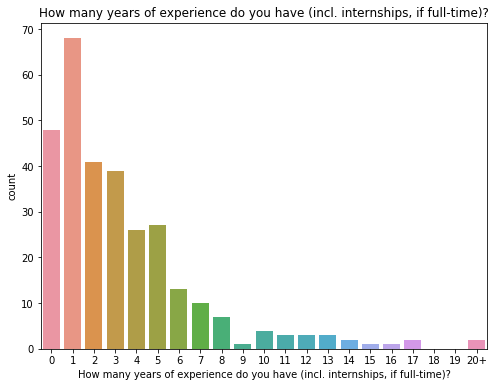

In [6]:
plt.rcParams['figure.figsize'] = [8, 6]

question = "How many years of experience do you have (incl. internships, if full-time)?"
df[question] = df[question].fillna('0') #because we use '20+' all of the ints are strings here. 

labels = ['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
         '20+']
ax = sns.countplot(x=question, order=labels, data=df)
plt.title(question)

In [7]:
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'Prefer not to say': 'Prefer not to say',
    'EU': 'Europe'
}

def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(str(country), cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
    except KeyError:
        continent_name = 'Prefer not to say'
    
    return continents[continent_name]

question = 'Where are you from?'
df['continent'] = df[question].apply(country_to_continent)

In [8]:
df[question].value_counts()

United Kingdom            76
Germany                   39
Italy                     15
India                     14
Portugal                  12
Spain                     10
Greece                     9
Ireland                    8
Poland                     8
Netherlands                8
France                     7
United States              6
Denmark                    5
Romania                    5
Sweden                     5
Lithuania                  5
Austria                    5
Hungary                    4
Finland                    4
Turkey                     4
Czech Republic             4
Bulgaria                   3
Norway                     2
Russia                     2
Brazil                     2
Switzerland                2
Argentina                  2
Slovenia                   1
Uruguay                    1
Albania                    1
Guatemala                  1
Macedonia                  1
Belgium                    1
Slovakia                   1
Croatia       

In [9]:
df['continent'].value_counts()

Europe               247
Asia                  25
Prefer not to say     12
North America          8
South America          6
Africa                 2
Australia              1
Name: continent, dtype: int64

Text(0.5, 1.0, 'What continent are you from?')

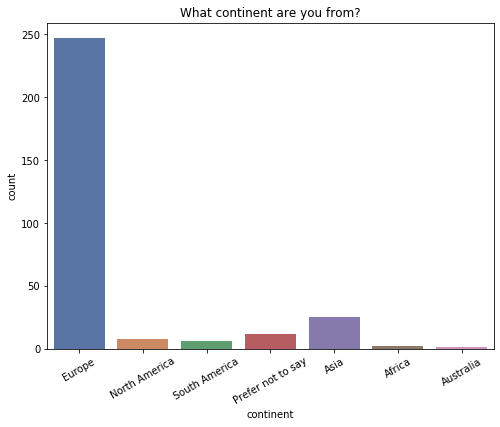

In [10]:
ax = sns.countplot(x='continent', data=df)
plt.xticks(rotation=30)
plt.title('What continent are you from?')

Text(0.5, 1.0, 'Where are you from?')

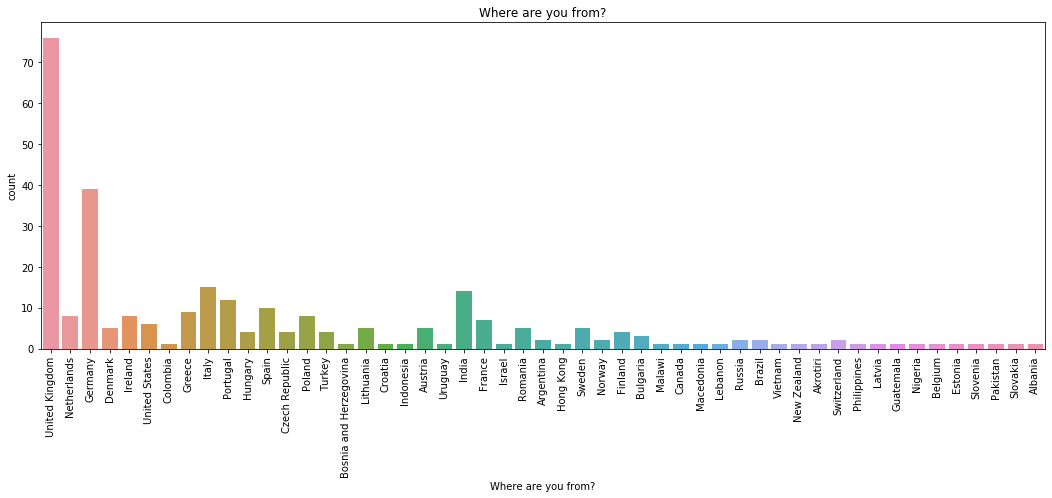

In [11]:
plt.rcParams['figure.figsize'] = [18, 6]
ax = sns.countplot(x=question, data=df)
plt.xticks(rotation=90)

plt.title(question)

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

def fix_comma(t):
    t = t.replace('\\', ' ')
    t = t.replace('/', ' ')
    return t.replace(',', '')

def column_to_wordcount(series):
    counts = series.str.split(expand=True).stack().value_counts()
    return counts

question = 'Open question: What do you mainly use the sub for?'

df[question] = df[question].fillna(' ')
df[question] = df[question].apply(remove_stopwords)

In [13]:
text = ' '.join(df[question].tolist()).lower()

In [14]:
text

'researching job market getting know greater cs community, getting career advice advice    keeping tabs industry trends getting sense tech industry europe look questions jobs studying certain city knowledge cs work culture countries   just browsing interested people\'s experiences europe salary job market information finding ways improve job applications. advice just casually reading, helping i  general career advice, eu specific cs career, ask questions certain eu companies practices learning eu job markets trends gain perspectives starting maintaining career cs (as developer)  seeing what\'s happening cs job market.  career advice what ppl doing, jobs countries information working eu  reading answers questions careers browsing job market europe   i mainly use check i’ll chance actually continue software programmer. read interesting questions answers entertainment keeping touch job market, getting advice job interviews/search i lurk landscape cs positions europe, i\'m planning career 

In [15]:
column_to_wordcount(df[question])

job                  24
career               23
market               18
EU                   17
salaries             15
                     ..
considering           1
News                  1
learning/salaries     1
resources             1
ppl                   1
Length: 510, dtype: int64

In [16]:
# word clouds, your management will love them!
from wordcloud import WordCloud

def get_wordcloud(text):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, width=800, height=400).generate(text)
    plt.figure( figsize=(20,10) )

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

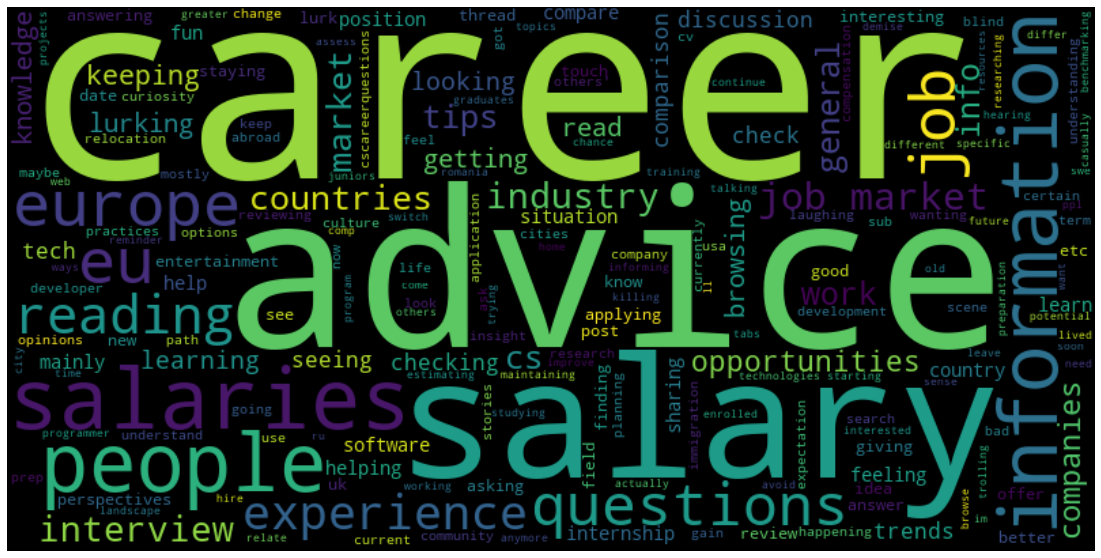

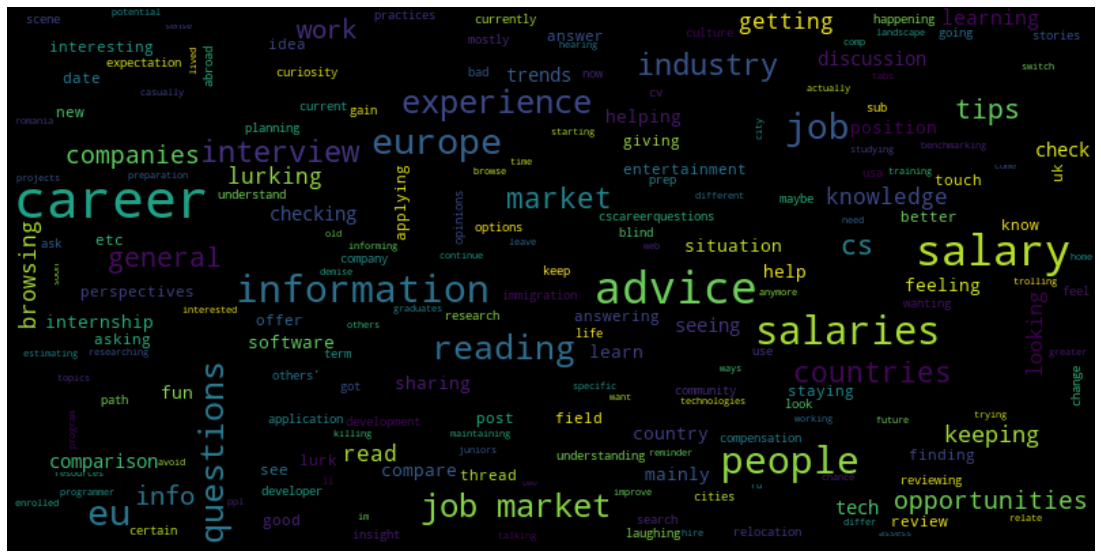

In [17]:
# wordcloud for responses based on text to 'Open question: What do you mainly use the sub for?'
get_wordcloud(text)

In [18]:
# some aggregated data based on these responses that I went through and labelled by hand
responses = { 
    "Career / Industry Advice and News": 78,
    "Salary tips": 49,
    "Entertainment, lurking, or trolling": 41,
    "I want to learn more about CS/dev life in Europe": 41,
    "interview/job hunting tips": 30,
    "Helping others": 14,
    "Advice on what tools to learn": 4,
    "internships": 4
}

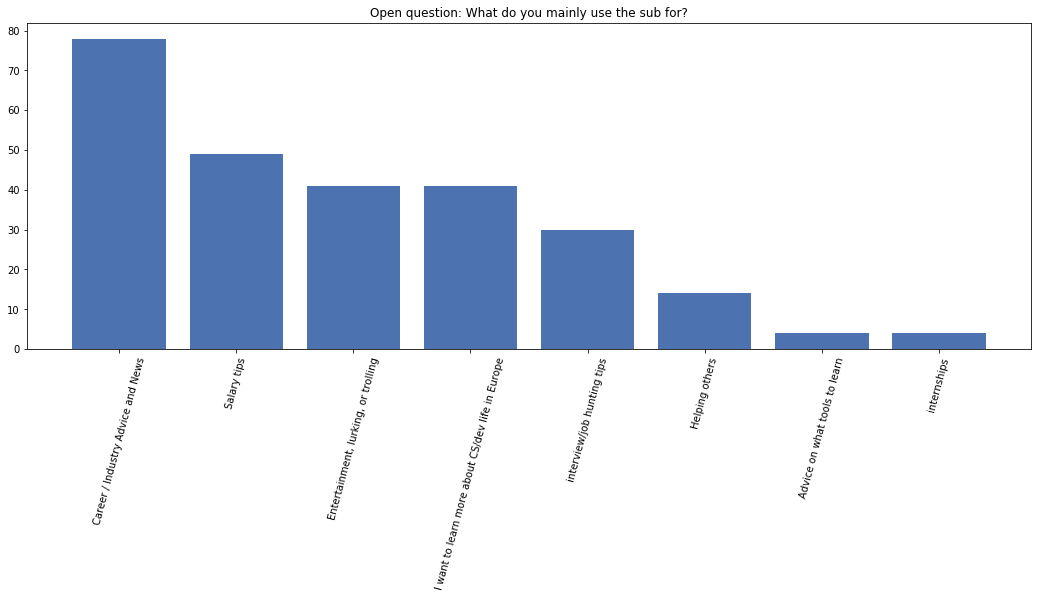

In [19]:
plt.bar(range(len(responses)), list(responses.values()), align='center')
plt.xticks(range(len(responses)), list(responses.keys()))
plt.xticks(rotation=75)
plt.title(question)
plt.show()


In [20]:
question = 'Outside of the recurring posts - What do you like seeing on the sub?'
df[question] = df[question].fillna(' ')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
text = ' '.join(df[question].tolist()).lower()
column_to_wordcount(df[question])

people       19
country       7
job           7
sharing       5
posts         5
             ..
opinions      1
reports       1
adversity     1
interpret     1
strory        1
Length: 323, dtype: int64

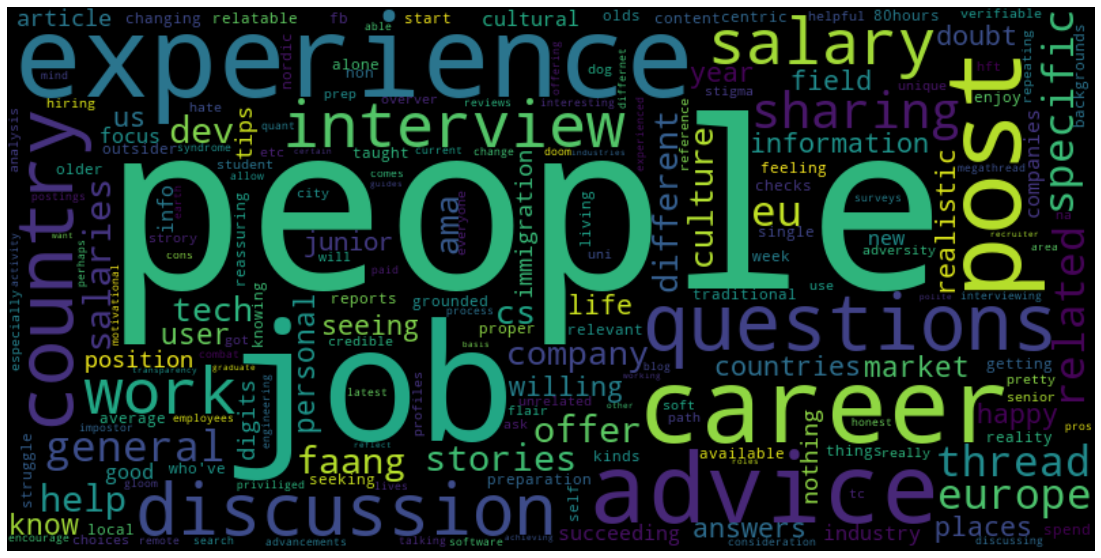

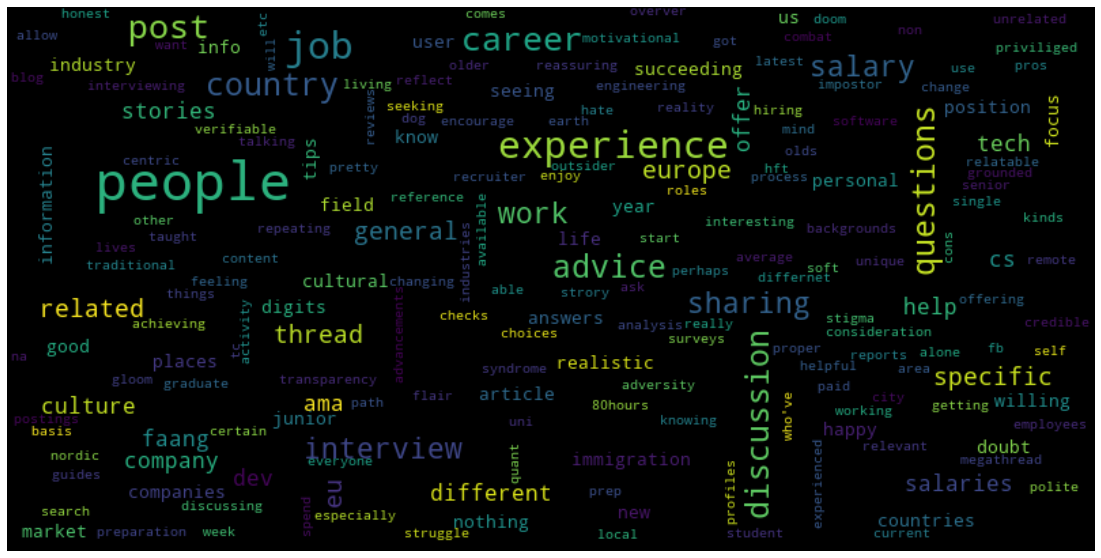

In [21]:
get_wordcloud(text)

In [22]:
question = 'Lastly, what do you dislike seeing on the sub?'
df[question] = df[question].fillna(' ')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
text = ' '.join(df[question].tolist()).lower()
column_to_wordcount(df[question])

people       15
questions    15
I            13
posts        10
FAANG         7
             ..
careers.      1
about         1
Dramatic      1
resources     1
oriented      1
Length: 437, dtype: int64

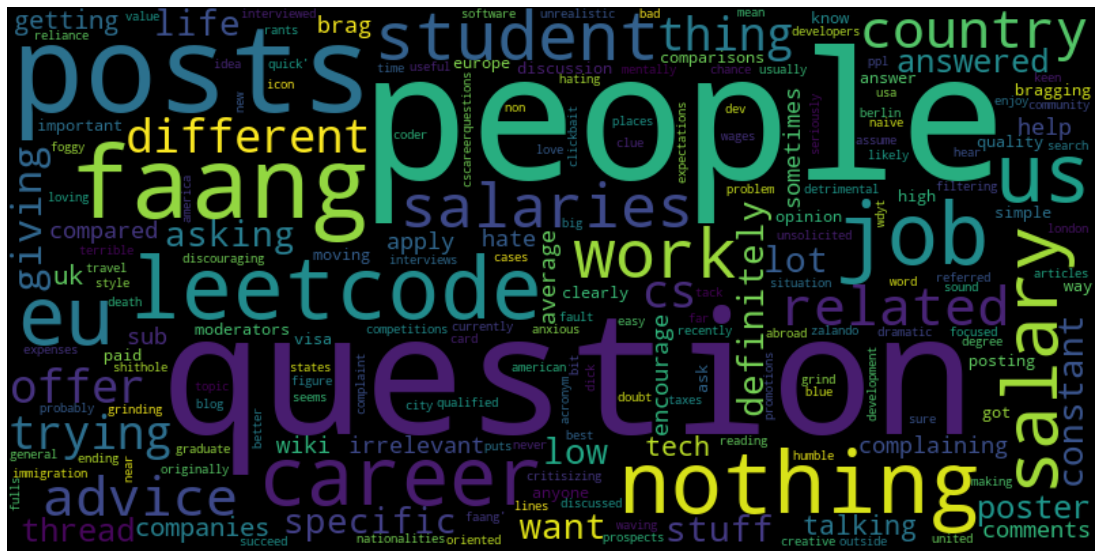

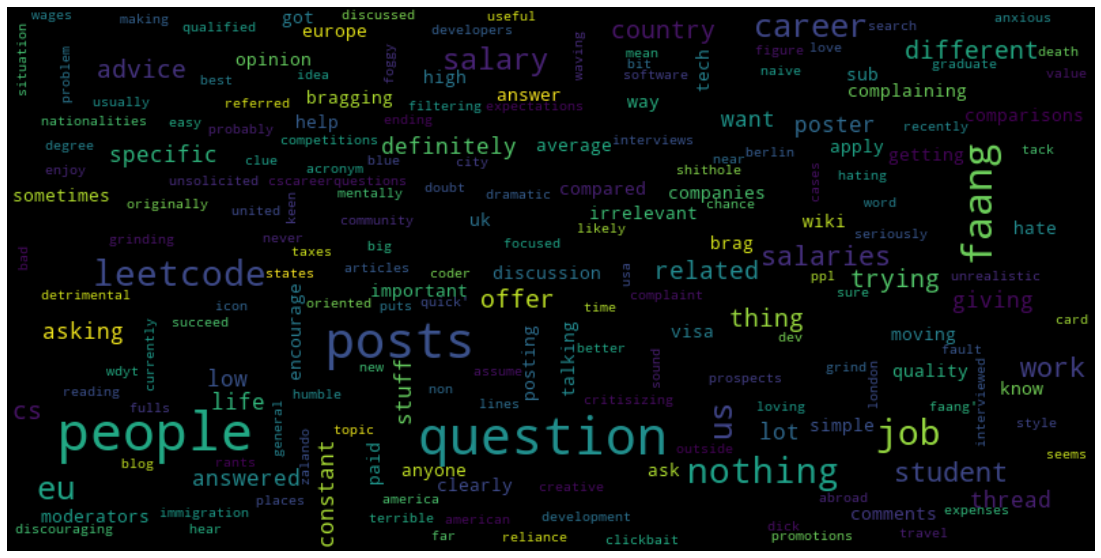

In [23]:
get_wordcloud(text)

In [24]:


question = 'What platforms do you use in your job hunt?'
df[question] = df[question].fillna(' ')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
text = ' '.join(df[question].tolist()).lower()
column_to_wordcount(df[question].apply(str.lower))[:10]

linkedin         174
glassdoor         27
indeed            17
xing              10
google             9
company            8
job                8
websites           8
stackoverflow      7
jobs               6
dtype: int64

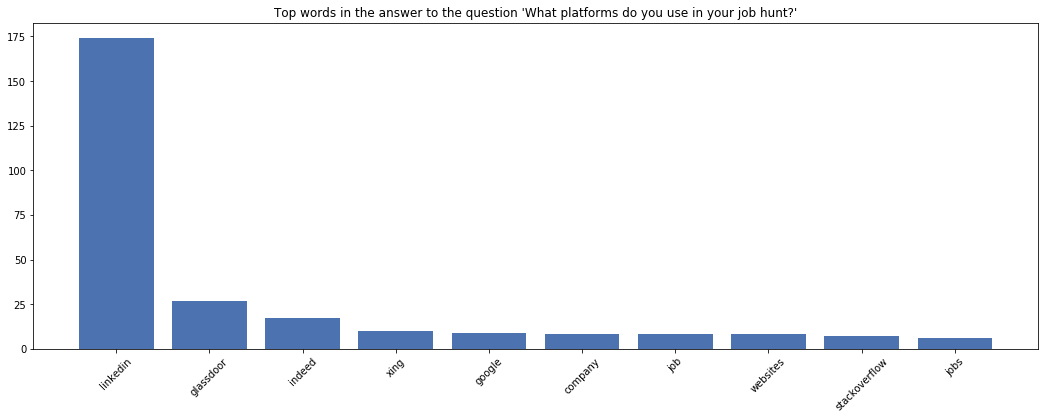

In [25]:
co = column_to_wordcount(df[question].apply(str.lower))[:10]
x = co.to_dict()

plt.bar(range(len(x)), list(x.values()), align='center')
plt.xticks(range(len(x)), list(x.keys()))
plt.xticks(rotation=45)
plt.title('Top words in the answer to the question \'' + question+'\'')
plt.show()

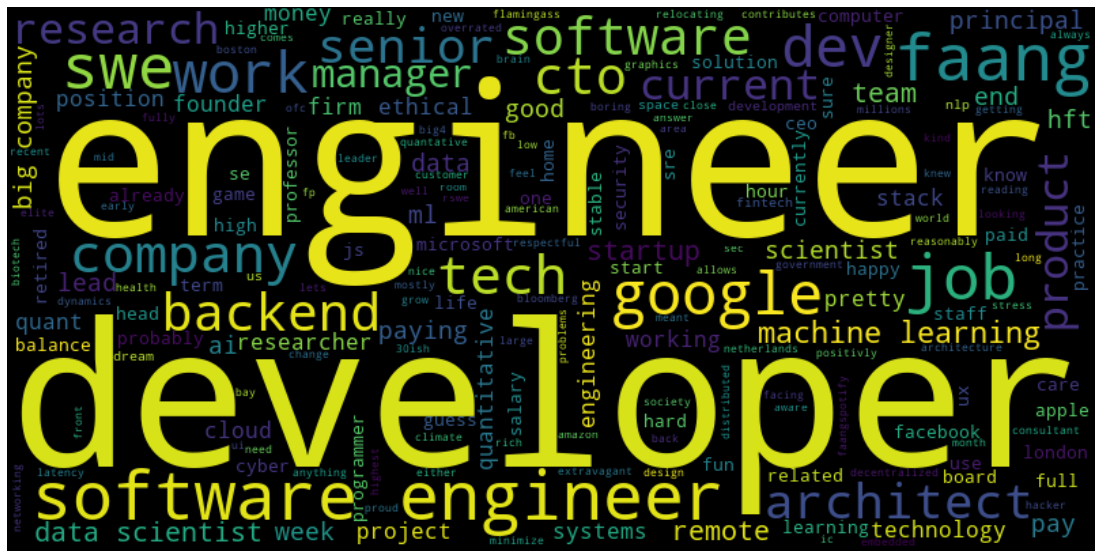

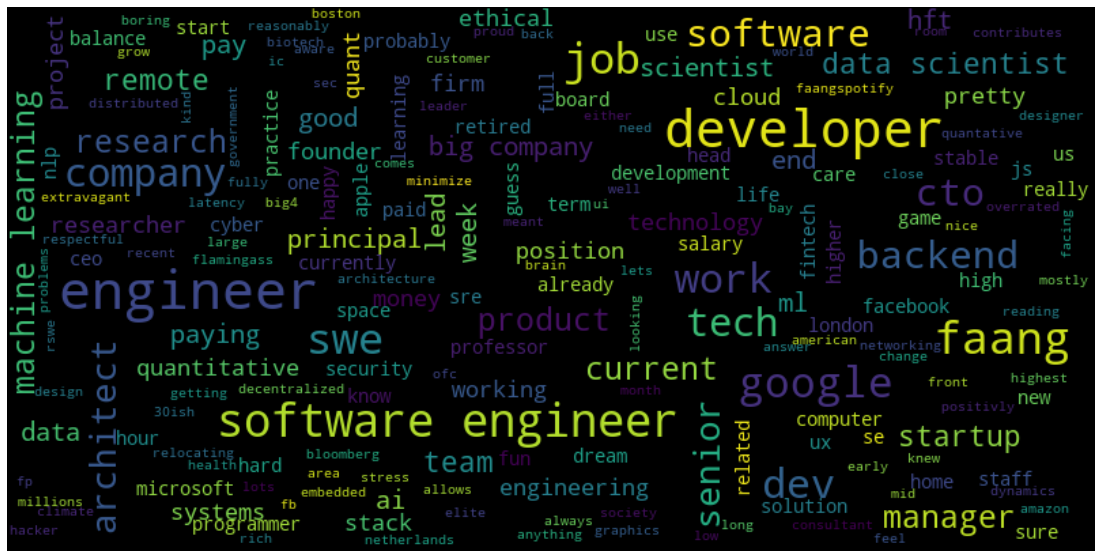

In [26]:
# dream jobs
question = 'What is your dream job?'

df[question] = df[question].fillna('')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
text = ' '.join(df[question].tolist()).lower()
get_wordcloud(text)

In [27]:
# job titles!
def replace_spaces(s:str)-> str:
    return s.replace(' ', '_')

question = 'What is your (current) job title?'

df[question] = df[question].fillna('')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
df[question] = df[question].apply(replace_spaces)
text = ' '.join(df[question].tolist()).lower()

column_to_wordcount(df[question].apply(str.lower))[:30]

software_engineer                35
student                          14
software_developer               13
senior_software_engineer          8
backend_engineer                  5
data_scientist                    4
phd_student                       3
backend_developer                 3
data_engineer                     3
machine_learning_engineer         3
tech_lead                         3
software_development_engineer     3
graduate_software_engineer        2
senior_engineer                   2
backend_dev                       2
software_engineer_ii              2
lead_developer                    2
front_end_developer               2
frontend_developer                2
junior_software_engineer          2
sde_intern                        2
data_analyst                      2
consultant                        2
research_engineer                 2
junior_software_developer         2
sre                               2
software_development_manager      2
graduate_swe                

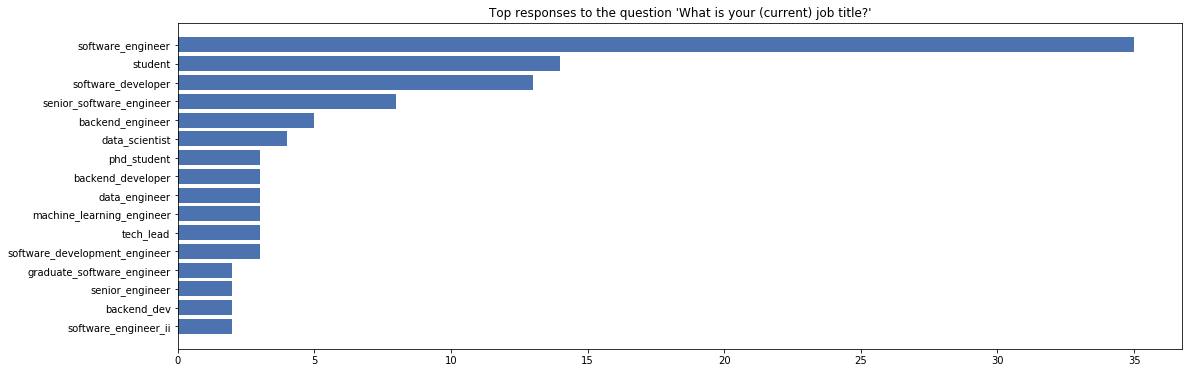

In [28]:
co = column_to_wordcount(df[question].apply(str.lower))[:16][::-1]
x = co.to_dict()

plt.barh(range(len(x)), list(x.values()), align='center')
plt.yticks(range(len(x)), list(x.keys()))
# plt.yticks(rotation=90)
plt.title('Top responses to the question \'' + question+'\'')
plt.show()

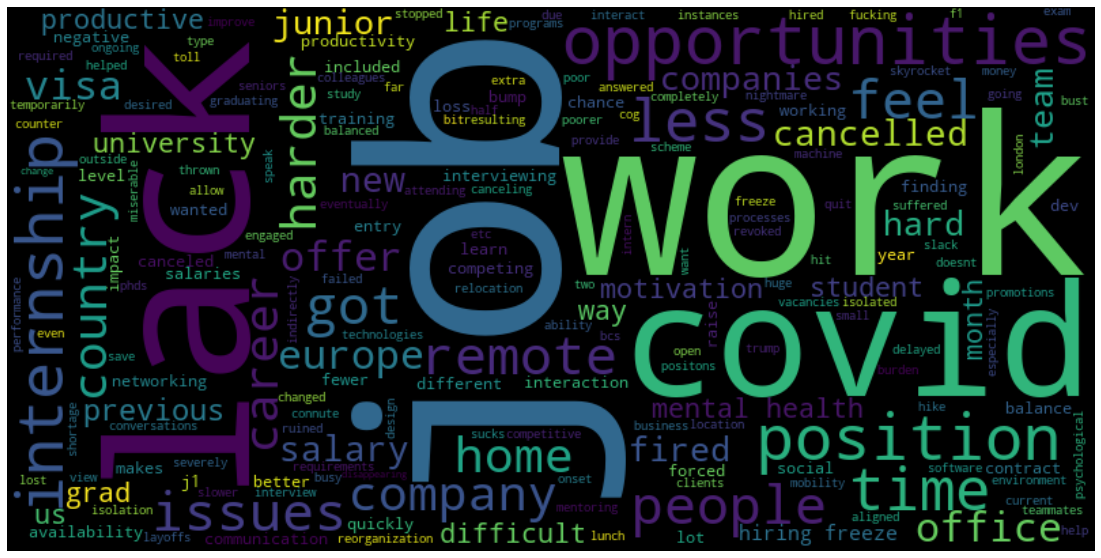

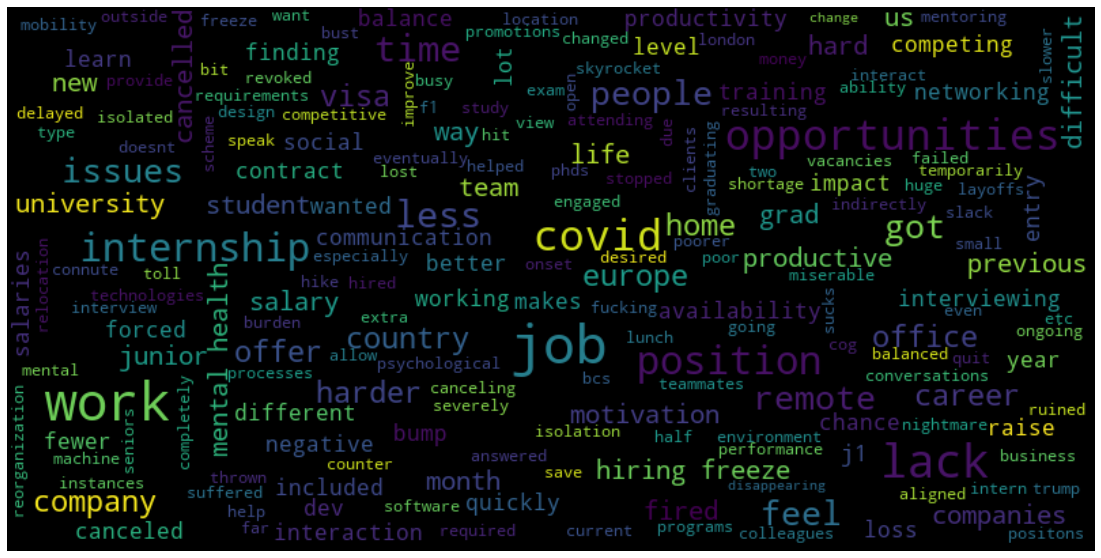

In [29]:
question = 'If you selected "yes" on the last question, could you tell us how?'


df[question] = df[question].fillna('')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
text = ' '.join(df[question].tolist()).lower()
get_wordcloud(text)

In [30]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS


question = 'Lastly, what do you find most important in a job?'

# Each sentence must be a list of string tokens:
df[question] = df[question].fillna('')
sentences =  df[question].apply(str.lower)
sentences = [x.split() for x in sentences]

# Train a toy phrase model on our training corpus.
phrase_model = Phrases(sentences, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)

def convert_phrases(s) -> str:
    s = s.split()
    return ' '.join(phrase_model[s])

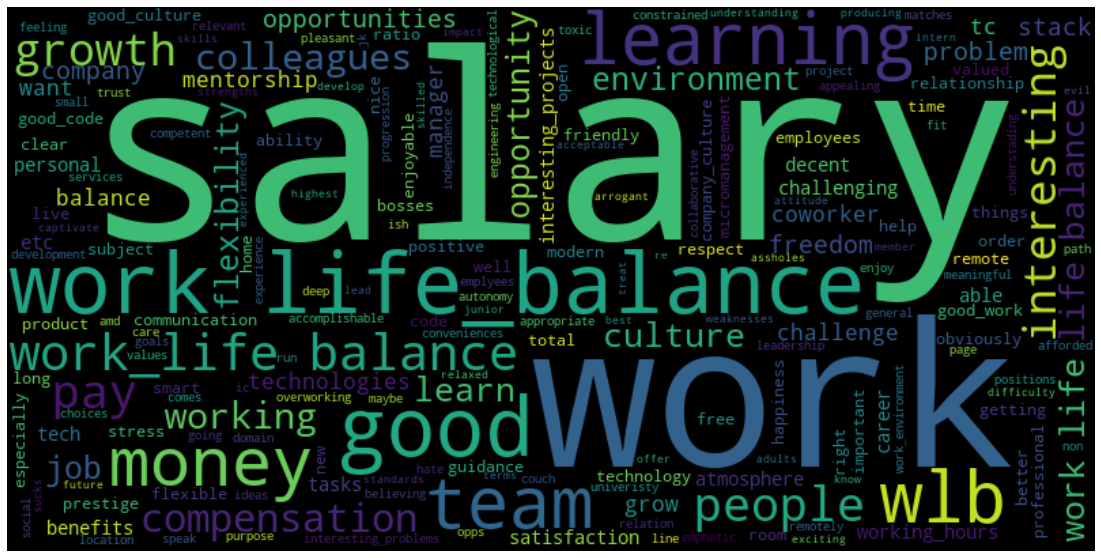

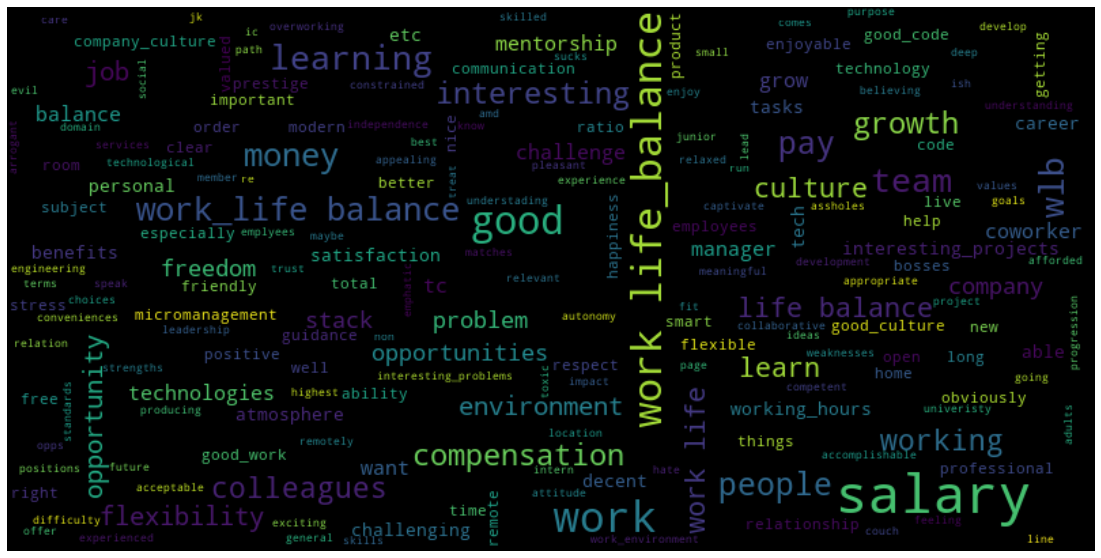

In [31]:
df[question] = df[question].fillna('')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(fix_comma)
df[question] = df[question].apply(convert_phrases)
text = ' '.join(df[question].tolist()).lower()
get_wordcloud(text)

In [32]:
# this is messy, but I'm not cleaning it up for the moment
df[question] = df[question].apply(replace_spaces)
column_to_wordcount(df[question].apply(str.lower))[:30]

salary                                                                                                                                                10
work_life_balance                                                                                                                                      9
wlb                                                                                                                                                    5
money                                                                                                                                                  4
team                                                                                                                                                   3
learning_opportunities                                                                                                                                 2
tc                                                                                

In [33]:
def correct_languages(s: str) -> str:
    s = s.lower().replace('golang', 'go')
    s = s.replace('amazon', 'aws')
    s = s.replace('nodejs', 'node')
    s = s.replace('node.js', 'node')
    s = s.replace('js', 'javascript')
    return s

question = 'What languages, tools or frameworks are you hoping to pick up the coming year(s)?'
df[question] = df[question].fillna(' ')
df[question] = df[question].apply(fix_comma)
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(correct_languages)

text = ' '.join(df[question].tolist()).lower()
column_to_wordcount(df[question].apply(str.lower))[:30]

go            39
rust          26
c++           21
react         19
python        17
spring        12
aws           12
kotlin        11
java           8
tensorflow     7
kubernetes     7
typescript     7
javascript     7
scala          7
angular        7
frameworks     6
boot           6
azure          5
pytorch        5
web            5
i              5
c#             5
maybe          5
elixir         4
tools          4
dart           4
data           4
swift          4
.net           4
flutter        4
dtype: int64

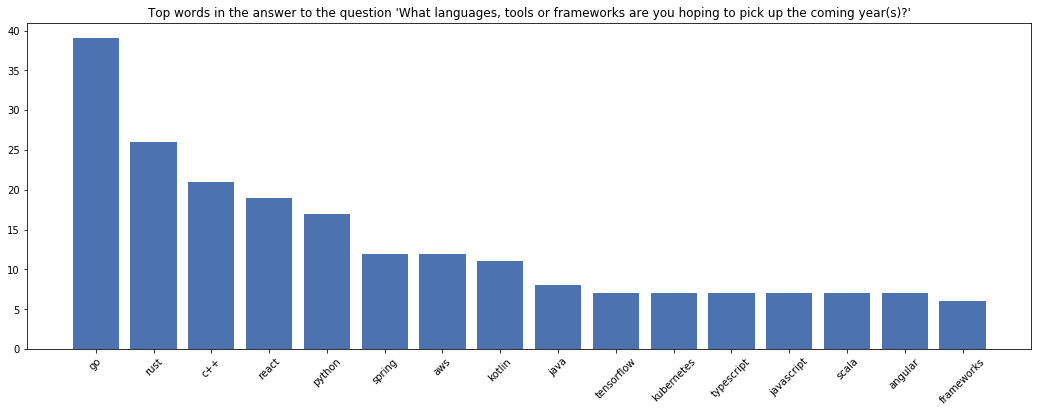

In [34]:
co = column_to_wordcount(df[question].apply(str.lower))[:16]
x = co.to_dict()

plt.bar(range(len(x)), list(x.values()), align='center')
plt.xticks(range(len(x)), list(x.keys()))
plt.xticks(rotation=45)
plt.title('Top words in the answer to the question \'' + question+'\'')
plt.show()

In [35]:
question = 'What programming language do you use most?'
df[question] = df[question].fillna(' ')
df[question] = df[question].apply(remove_stopwords)
df[question] = df[question].apply(correct_languages)
df[question] = df[question].apply(fix_comma)

text = ' '.join(df[question].tolist()).lower()
column_to_wordcount(df[question].apply(str.lower))[:50]

python            96
java              58
javascript        36
c#                24
c++               23
typescript        14
go                13
c                 10
php                7
node               7
kotlin             6
rust               5
ruby               4
r                  4
scala              4
bash               3
ts                 2
.net               2
sql                2
lot                2
css                2
previously         1
javascript.        1
minute             1
sign               1
abap               1
pl                 1
python+            1
my                 1
powershell         1
kotlin.            1
too                1
nil                1
react              1
familiar           1
days               1
i                  1
(javascript        1
job                1
use                1
design             1
involves           1
(or)               1
i'm                1
frameworks         1
(embedded)         1
n                  1
soon         

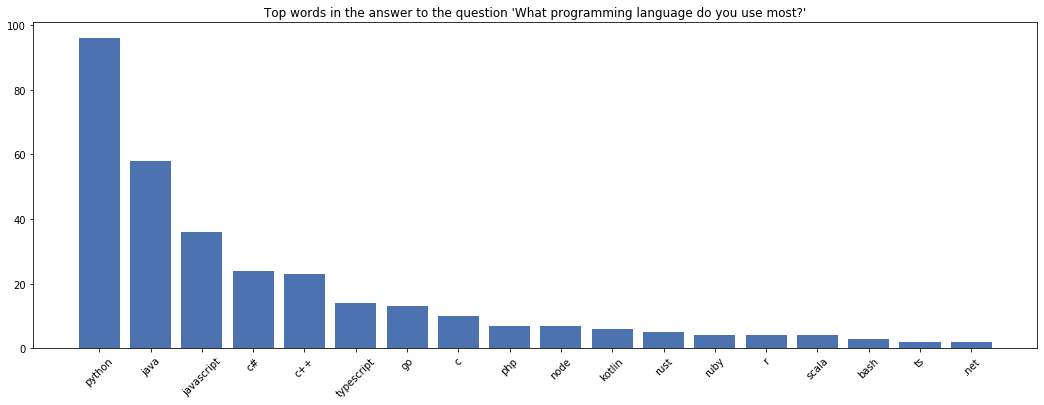

In [36]:
co = column_to_wordcount(df[question].apply(str.lower))[:18]
x = co.to_dict()

plt.bar(range(len(x)), list(x.values()), align='center')
plt.xticks(range(len(x)), list(x.keys()))
plt.xticks(rotation=45)
plt.title('Top words in the answer to the question \'' + question+'\'')
plt.show()

In [37]:
q1 = 'How many years of experience do you have (incl. internships, if full-time)?'
q2 = 'Over the course of your career, how many job applications have you submitted?'

df[q1] = df[q1].replace('20+', 20)

In [38]:
df[q1] = df[q1].astype(int)

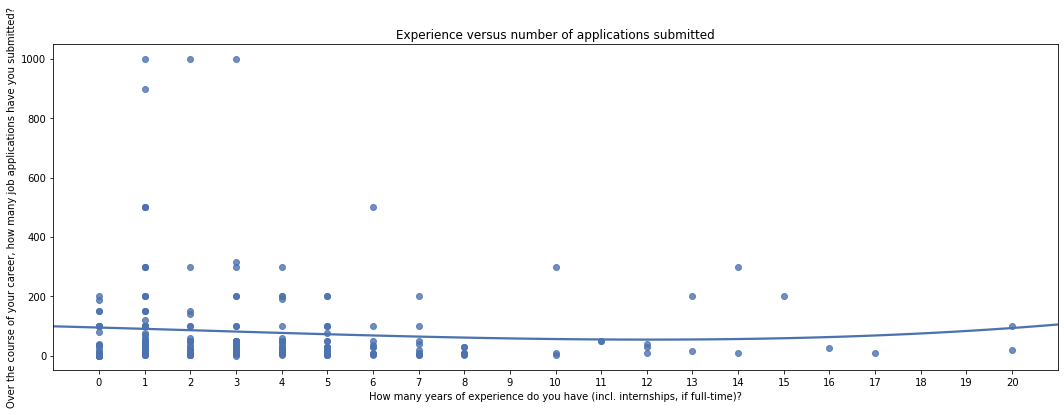

In [39]:
# make a scatterplot of experience vs. how many applications submitted
fig, ax = plt.subplots()
sns.regplot(data=df, x=q1, y=q2, ax=ax, order=3, ci=None)
ax.set_xlim(-1,21)
ax.set_xticks(range(0,21))
plt.title('Experience versus number of applications submitted')
plt.show()



Text(0.5, 1.0, 'Age buckets versus number of applications submitted')

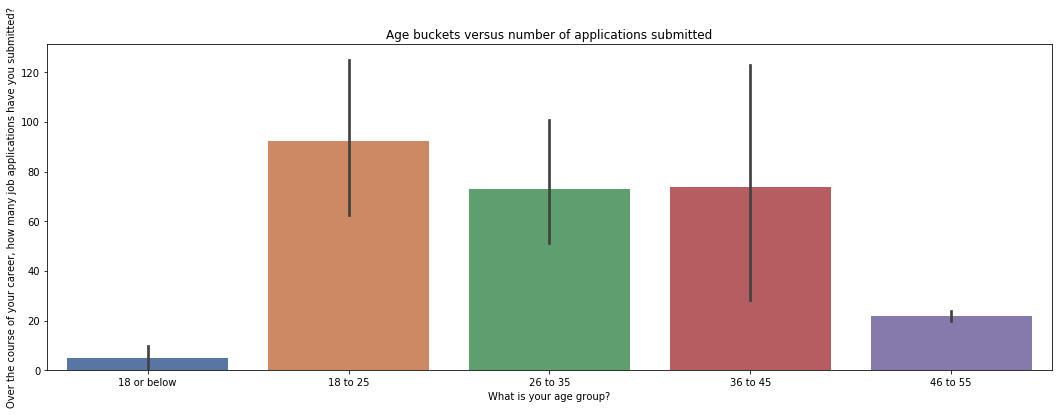

In [40]:
q1 = 'What is your age group?'
ax = sns.barplot(x=q1, y=q2, data=df, order=['18 or below', '18 to 25', '26 to 35', '36 to 45', '46 to 55'])
plt.title('Age buckets versus number of applications submitted')

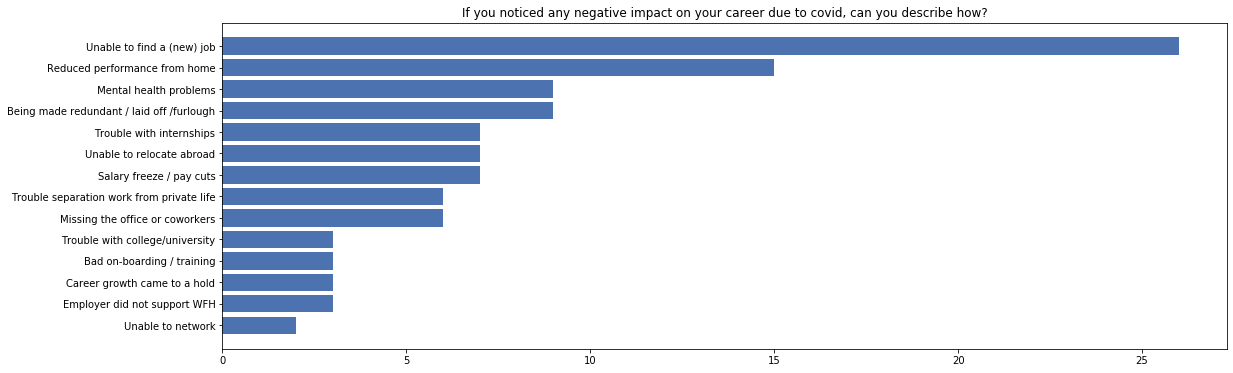

In [41]:
# responses to the question "has there been any negative impact from covid on your career? How so?"
responses = {
    "Unable to find a (new) job":26,
    "Reduced performance from home":15,
   " Mental health problems":9,
    "Being made redundant / laid off /furlough":9,
    "Trouble with internships":7,
    "Unable to relocate abroad":7,
    "Salary freeze / pay cuts":7,
    "Trouble separation work from private life":6,
    "Missing the office or coworkers":6,
    "Trouble with college/university":3,
    "Bad on-boarding / training":3,
    "Career growth came to a hold":3,
    "Employer did not support WFH":3,
    "Unable to network":2

}

plt.barh(range(len(responses)), list(responses.values())[::-1], align='center')
plt.yticks(range(len(responses)), list(responses.keys())[::-1])
#plt.xticks(rotation=15)
plt.title("If you noticed any negative impact on your career due to covid, can you describe how?")
plt.show()